In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load the digits dataset
digits = datasets.load_digits()
X = digits.data          # Each image is 8x8 = 64 pixels, flattened
y = digits.target        # Digit labels: 0–9


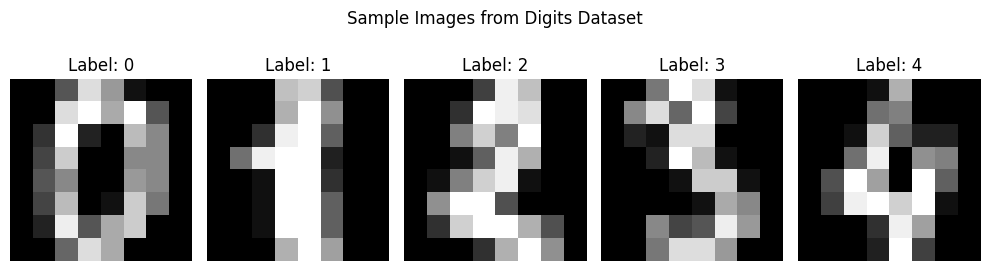

In [3]:
# Display a few sample digits
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.suptitle("Sample Images from Digits Dataset")
plt.tight_layout()
plt.show()


In [4]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train an SVM classifier
model = SVC(kernel='rbf', gamma=0.001, C=10)
model.fit(X_train_scaled, y_train)


SVC(C=10, gamma=0.001)

In [7]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       1.00      0.94      0.97        54
           4       1.00      1.00      1.00        60
           5       0.98      0.98      0.98        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



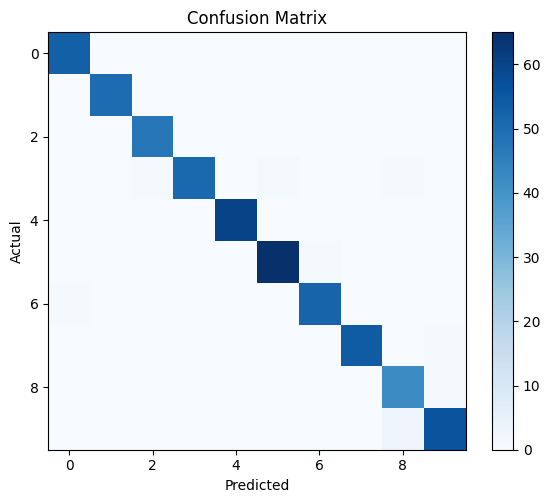

In [8]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.tight_layout()
plt.show()